### OWSLib with the ArcGIS API for Python

In [107]:
from owslib.wcs import WebCoverageService

In [ ]:
# requests WCS
wcs = WebCoverageService('http://geo.weather.gc.ca/geomet/', version='2.0.1')

In [ ]:
# display the contents of the WCS
wcs.contents

{'CIOPS-East_2km_MixedLayerThickness': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fae6a50>,
 'CIOPS-East_2km_SeaIceAreaFraction': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fe5c950>,
 'CIOPS-East_2km_SeaIceCompressiveStrength': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fe45850>,
 'CIOPS-East_2km_SeaIceDivergence': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fe45650>,
 'CIOPS-East_2km_SeaIceInternalPressure': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fe449d0>,
 'CIOPS-East_2km_SeaIceShear': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fe6bb90>,
 'CIOPS-East_2km_SeaIceSnowTemp': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fe69250>,
 'CIOPS-East_2km_SeaIceSnowVol': <owslib.coverage.wcs201.ContentMetadata at 0x1bc1fe6ad10>,
 'CIOPS-East_2km_SeaIceVelocityX': <owslib.coverage.wcs201.ContentMetadata at 0x1bc20efe390>,
 'CIOPS-East_2km_SeaIceVelocityY': <owslib.coverage.wcs201.ContentMetadata at 0x1bc20efe3d0>,
 'CIOPS-East_2km_SeaIceVol': <owslib.cover

In [110]:
[coverage for coverage in wcs.contents.keys()]


['CIOPS-East_2km_MixedLayerThickness',
 'CIOPS-East_2km_SeaIceAreaFraction',
 'CIOPS-East_2km_SeaIceCompressiveStrength',
 'CIOPS-East_2km_SeaIceDivergence',
 'CIOPS-East_2km_SeaIceInternalPressure',
 'CIOPS-East_2km_SeaIceShear',
 'CIOPS-East_2km_SeaIceSnowTemp',
 'CIOPS-East_2km_SeaIceSnowVol',
 'CIOPS-East_2km_SeaIceVelocityX',
 'CIOPS-East_2km_SeaIceVelocityY',
 'CIOPS-East_2km_SeaIceVol',
 'CIOPS-East_2km_SeaSfcHeight',
 'CIOPS-East_2km_SeaWaterPotentialTemp_0.5m',
 'CIOPS-East_2km_SeaWaterSalinity_0.5m',
 'CIOPS-East_2km_SeaWaterVelocityX_0.5m',
 'CIOPS-East_2km_SeaWaterVelocityY_0.5m',
 'CIOPS-East_2km_TurboclineDepth',
 'CIOPS-East_SeaWaterPotentialTemp_1.5m',
 'CIOPS-East_SeaWaterPotentialTemp_2.5m',
 'CIOPS-East_SeaWaterPotentialTemp_3.5m',
 'CIOPS-East_SeaWaterPotentialTemp_4.5m',
 'CIOPS-East_SeaWaterPotentialTemp_5.5m',
 'CIOPS-East_SeaWaterPotentialTemp_6.5m',
 'CIOPS-East_SeaWaterPotentialTemp_7.5m',
 'CIOPS-East_SeaWaterPotentialTemp_8.5m',
 'CIOPS-East_SeaWaterPotentia

In [ ]:
# Explore the properties of a specific coverage
wcs.contents['OCEAN.GIOPS.3D_SALW_0000']

In [ ]:
# Available formats
wcs.contents['OCEAN.GIOPS.3D_SALW_0000'].supportedFormats

['image/tiff',
 'image/x-aaigrid',
 'image/netcdf',
 'application/x-grib2',
 'image/png',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8']

In [ ]:
# Available extent
wcs.contents['OCEAN.GIOPS.3D_SALW_0000'].boundingboxes

[{'nativeSrs': 'http://www.opengis.net/def/crs/EPSG/0/4326',
  'bbox': (-80.1, -180.0, 89.9, 180.0)}]

In [ ]:
# axis labels - changes from coverage to coverage
wcs.contents['OCEAN.GIOPS.3D_SALW_0000'].grid.axislabels

['long', 'lat']

In [ ]:
# dimensions - 2 indicates 2D data, 3 indicates a time or depth dimension
wcs.contents['OCEAN.GIOPS.3D_SALW_0000'].grid.dimension

2

In [ ]:
# lower values of the bounding box
wcs.contents['OCEAN.GIOPS.3D_SALW_0000'].grid.lowlimits

['0', '0']

In [ ]:
# upper values of the bounding box
wcs.contents['OCEAN.GIOPS.3D_SALW_0000'].grid.highlimits

['1799', '849']

In [ ]:
# time positions - only available if a time dimension is present
wcs.contents['OCEAN.GIOPS.3D_SALW_0000'].timepositions

In [ ]:
# build a request with WCS properties from OWSLib
coverage = 'OCEAN.GIOPS.3D_SALW_0000'
format = 'image/tiff'
bbox = wcs.contents[coverage].boundingboxes[0]['bbox']
crs = wcs.contents[coverage].boundingboxes[0]['nativeSrs']
w = int(wcs.contents[coverage].grid.highlimits[0] )
h = int(wcs.contents[coverage].grid.highlimits[1])

# submit the request
output = wcs.getCoverage(
    identifier=[coverage, ], 
    crs=crs,
    bbox=bbox, 
    width=w, 
    height=h, 
    format=format
)

# view the URL of the output
output.geturl()

'https://geo.weather.gc.ca/geomet?version=2.0.1&request=GetCoverage&service=WCS&CoverageID=OCEAN.GIOPS.3D_SALW_0000&crs=http://www.opengis.net/def/crs/EPSG/0/4326&format=image/netcdf&width=1799&height=849'

In [ ]:
# save the output to a file
# would be nice to read into memory vs. saving to disk
wcs_filename = coverage + '.tif'

with open(wcs_filename, 'wb') as file:
    file.write(output.read())

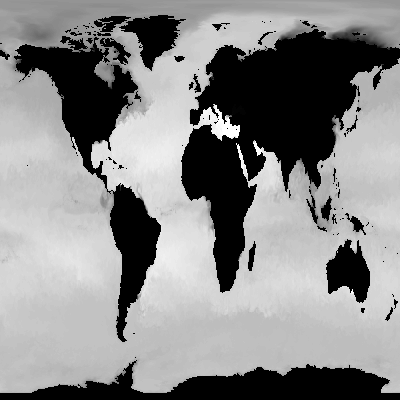

In [ ]:
# with the arcgis api, we can easily read the raster from disk
import arcgis

raster = arcgis.raster.Raster(wcs_filename)
raster

In [ ]:
# perform some raster analytics
gis = arcgis.gis.GIS("home")

copy_raster_op = arcgis.raster.analytics.copy_raster(
    input_raster=wcs_filename,
    output_name="Ocean GIOPS 3D SALW",
    raster_type_name="Raster Dataset",
    gis=gis,
    tiles_only=True
)

In [ ]:
# view content item
copy_raster_op

<Item title:"Ocean GIOPS 3D SALW" type:Tiled Imagery Layer owner:col12422@esri.com_esrifederal>

In [ ]:
# add service to map
m = gis.map()
m

Map(extent={'xmin': -13932302.189713778, 'ymin': 1799627.88014072, 'xmax': -6574751.7652280005, 'ymax': 743518…

In [125]:
m.content.add(copy_raster_op)
m.zoom = 2